### Importing Relevant Libraries  - Importation de bibliothèques 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sns.set()

## Loading Dataset

In [4]:
data = pd.read_csv("Country-clusters.csv")
dataset = data.copy()
dataset

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


## Plot the data

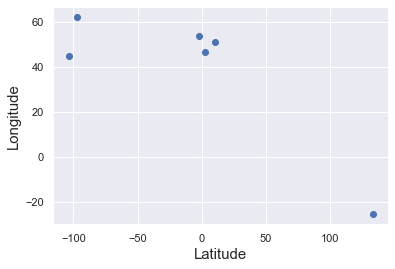

In [6]:
plt.scatter(dataset["Longitude"], dataset["Latitude"])
plt.xlabel("Latitude", size=15)
plt.ylabel("Longitude", size=15)
plt.show()

# Select the features

In [7]:
x = dataset.iloc[:,1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


## Clustering     -     Regroupement

In [9]:
# Create a KMeans object and assignthe number of desired clusters
# Créer un objet KMeans et assigner le nombre de clusters désirés.

kmeans = KMeans(2)
kmeans

KMeans(n_clusters=2)

In [10]:
# Fitting the data for the actual clustering process
# Ajustement des données pour l'actuel processus de clustering 

kmeans.fit(x)

KMeans(n_clusters=2)

## Clustering Results - Résultats des regroupements

In [14]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, 0, 0, 1])

In [13]:
# Two clusters 0 and 1 were created and the provided data has been partitioned (Grouped) accordingly
# Deux clusters 0 et 1 ont été créés et les données fournies ont été partitionnées (groupées) 
# en conséquence dans les clusters 0 et 1. 

In [15]:
# creating a Dataframe to include the new clusters
# créer un Dataframe pour inclure les nouveaux clusters

frame_with_clusters = dataset
frame_with_clusters["Clusters"] = identified_clusters
frame_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


In [16]:
# It seems the data was clustered depending on the hemisphere where the countrie belongs to
# Il semble que les données aient été regroupées en fonction de l'hémisphère auquel appartient le pays.

### Cluster Plot

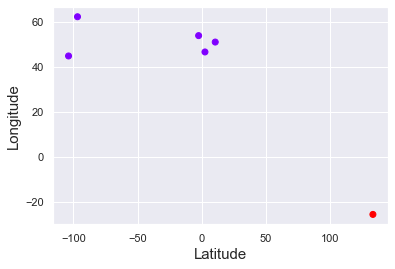

In [17]:
plt.scatter(frame_with_clusters["Longitude"], frame_with_clusters["Latitude"],
            c=frame_with_clusters["Clusters"], cmap="rainbow")
plt.xlabel("Latitude", size=15)
plt.ylabel("Longitude", size=15)
plt.show()

In [18]:
# If I want to increase the number of clusters, I simply go up and change the value of KMeans(value)
# Si je veux augmenter le nombre de clusters, il me suffit de remonter et de changer la valeur de KMeans(valeur)

#### Clustering with Categorical Data - Regroupement avec des données catégorielles

In [22]:
dataset_categorical = data.copy()
dataset_categorical

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [23]:
# Mapping languages with integers (Not optimal but this should workjust fine)
# cartographier Language avec des nombre entiers
#     (Ce n'est pas optimal mais cela devrait fonctionner parfaitement)

dataset_categorical["Language"] = dataset_categorical["Language"].map({"English": 0, "French": 1,"German": 2})
dataset_categorical

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


#### Selecting data for Clustering - Sélection des données pour le clustering

In [27]:
# x = dataset_categorical["Language"] # Not advisable as it only takes the column values
# Pas recommandé car il ne prend que les valeurs de la colonne.

x = dataset_categorical.iloc[:,3:4]
x

,Language
0,0
1,0
2,1
3,0
4,2
5,0


In [37]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [38]:
clusters_identified = kmeans.fit_predict(x)
clusters_identified

array([0, 0, 2, 0, 1, 0])

In [39]:
# Add clusters_identified to a Dataset
# Ajouter clusters_identified à un jeu de données

dataset_clustered = dataset_categorical
dataset_clustered["Cluster"] = clusters_identified
dataset_clustered

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,2
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,1
5,Australia,-25.45,133.11,0,0


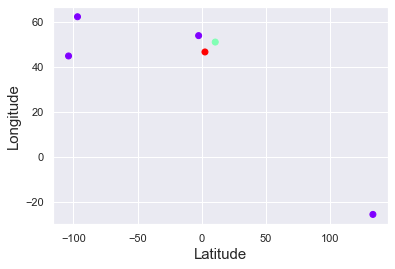

In [40]:
plt.scatter(dataset_clustered["Longitude"], dataset_clustered["Latitude"],
           c=dataset_clustered["Cluster"], cmap="rainbow")
plt.xlabel("Latitude", size=15)
plt.ylabel("Longitude", size=15)
plt.show()

### Selecting the number of clusters  -  Sélection du nombre de clusters

### WCSS (within-cluster sum of squares)
WCSS is a measure developed within the ANOVA framework. It gives a very good idea about the different distance between different clusters and within clusters, thus providing us a rule for deciding the appropriate number of clusters.

In [41]:
# Get the WCSS for the current solution
# Obtenir le WCSS pour la solution actuelle

kmeans.inertia_

0.0

In [42]:
# Create an empty list
# Créer une liste vide

wcss=[]

# Create all possible cluster solutions with a loop
# Créer toutes les solutions possibles de cluster avec une boucle

for i in range(1,7):
    # Cluster solution with i clusters  - Solution de cluster avec i clusters
    kmeans = KMeans(i)
    
    # Fit the data  - Ajustement des données
    kmeans.fit(x)
    
    # Find WCSS for the current iteration  - Trouver le WCSS pour l'itération actuelle
    wcss_iter = kmeans.inertia_
    
    # Append the value to the WCSS list - Ajouter la valeur à la liste WCSS
    wcss.append(wcss_iter)

<ipython-input-42-fd86639c7e17>:14: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  kmeans.fit(x)
<ipython-input-42-fd86639c7e17>:14: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(x)
<ipython-input-42-fd86639c7e17>:14: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeans.fit(x)


In [43]:
wcss

[3.5, 0.5, 0.0, 0.0, 0.0, 0.0]

## The Elbow Method - La méthode du coude

Text(0, 0.5, 'Within-cluster Sum of Squares')

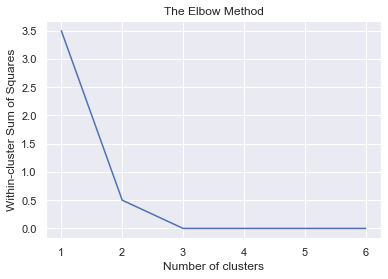

In [45]:
# Create a variable containing the numbers from 1 to 6, so we can use it as X axis of the future plot
# Créez une variable contenant les nombres de 1 à 6, afin de l'utiliser comme axe X du futur graphique.

number_clusters = range(1,7)

# Plot the number of clusters vs WCSS
# Tracer le nombre de clusters vs WCSS

plt.plot(number_clusters,wcss)


# Name of the graph - Nom du graphique
plt.title('The Elbow Method')

plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

From the above graph, there are two point of interest, 2 and 3 so,
choosing 3(K: number of clusters) means a wider range of clusters which is more explanatory

D'après le graphique ci-dessus, il y a deux points d'intérêt, 2 et 3 donc,
choisir 3 (K : nombre de clusters) signifie un plus grand nombre de clusters, ce qui est plus explicatif.

# Heatmaps using Seaborn

# Loading Data   - Chargement des données

In [10]:
# Load the standardized data
# index_col is an argument set to one of the columns
# this will cause one of the Series to become the index

# Charger les données normalisées
# index_col est un argument défini sur l'une des colonnes
# cela fera en sorte qu'une des séries devienne l'index


data = pd.read_csv('Country clusters standardized.csv', index_col='Country')

In [11]:
# Create a new data frame for the inputs, so we can clean it
# Créer un nouveau cadre de données pour les entrées, afin que nous puissions le nettoyer.
x_scaled = data.copy()

# Drop the variables that are unnecessary for this solution
# Supprimez les variables qui ne sont pas nécessaires pour cette solution.
x_scaled = x_scaled.drop(['Language'],axis=1)

In [12]:
# Check what's inside the dataset
# Vérifier le contenu de l'ensemble de données

x_scaled

,Latitude,Longitude
Country,,
USA,0.186540,-1.089160
Canada,0.728588,-1.008604
France,0.241895,0.137900
UK,0.467671,0.080922
Germany,0.378729,0.230360
Australia,-2.003422,1.648581


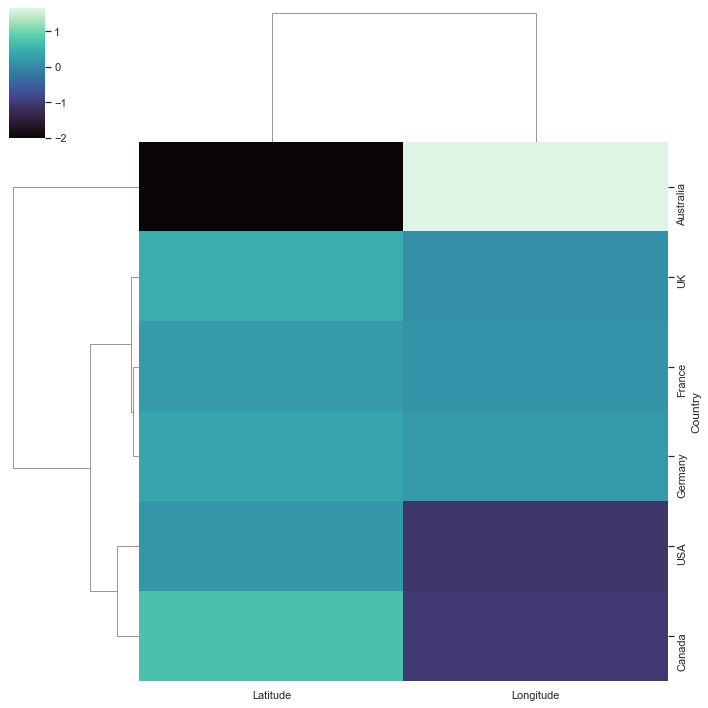

In [9]:
#  Using the Seaborn method 'clustermap' to get a heatmap and dendrograms for both the observations and the features
# The cmap 'mako' has one of the best coloour scheme

#  Utilisation de la méthode Seaborn 'clustermap' pour obtenir une carte thermique et des dendrogrammes pour les observations et les caractéristiques.
# Le cmap 'mako' a l'un des meilleurs schémas de couleurs.

sns.clustermap(x_scaled, cmap='mako')